In [1]:
# Build a model that predicts the rating of a movie based on
# features like genre, director, and actors. You can use regression
# techniques to tackle this problem.
# The goal is to analyze historical movie data and develop a model
# that accurately estimates the rating given to a movie by users or
# critics.
# Movie Rating Prediction project enables you to explore data
# analysis, preprocessing, feature engineering, and machine
# learning modeling techniques. It provides insights into the factors
# that influence movie ratings and allows you to build a model that
# can estimate the ratings of movies accurately.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving IMDb_Movies_India.csv to IMDb_Movies_India.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['IMDb_Movies_India.csv']), encoding='latin1')
print(df)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           A

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
#data cleaning and general descriptive analysis

In [11]:
df_num=df.select_dtypes(exclude='object')#getting numerical columns in a separate data frame

In [12]:
print("Mean/Average of all numeric columns:")
print(df_num.mean(axis = 0))
print()
print("Minimum of all numeric columns:")
print(df_num.min(axis = 0))
print()
print("Maximum of all numeric columns:")
print(df_num.max(axis = 0))

Mean/Average of all numeric columns:
Rating    5.841621
dtype: float64

Minimum of all numeric columns:
Rating    1.1
dtype: float64

Maximum of all numeric columns:
Rating    10.0
dtype: float64


In [13]:
print("Mean/Average of all numeric rows:")
print(df_num.mean(axis = 1))
print()
print("Minimum of all numeric rows:")
print(df_num.min(axis = 1))
print()
print("Maximum of all numeric rows:")
print(df_num.max(axis = 1))

Mean/Average of all numeric rows:
0        NaN
1        7.0
2        NaN
3        4.4
4        NaN
        ... 
15504    4.6
15505    4.5
15506    NaN
15507    NaN
15508    6.2
Length: 15509, dtype: float64

Minimum of all numeric rows:
0        NaN
1        7.0
2        NaN
3        4.4
4        NaN
        ... 
15504    4.6
15505    4.5
15506    NaN
15507    NaN
15508    6.2
Length: 15509, dtype: float64

Maximum of all numeric rows:
0        NaN
1        7.0
2        NaN
3        4.4
4        NaN
        ... 
15504    4.6
15505    4.5
15506    NaN
15507    NaN
15508    6.2
Length: 15509, dtype: float64


In [14]:
# number of missing values of each column

In [15]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [16]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print()

Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' '(1932)' '(1923)' '(1915)' '(1928)'
 '(1922)' '(1

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [23]:
#handling null values

In [24]:
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

df['Genre'] = df['Genre'].str.split(', ')
df=df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [25]:
#removing duplicate values

In [26]:
df = df.drop_duplicates(subset=['Name'], keep=False)

In [27]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
10,An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
30,Park Avenue,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
32,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor
...,...,...,...,...,...,...,...,...,...,...
15478,Zindagi Tere Naam,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta
15479,Zindagi Tumse,2019,120,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15482,Zindagi Zindabad,2000,140,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15488,Zoo,2018,100,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta


In [28]:
numeric_columns=list(df.select_dtypes(exclude='object').columns)

In [29]:
numeric_columns

['Year', 'Duration', 'Rating', 'Votes']

In [30]:
def calculate_row_num(col_num, len_num):
    rem = len_num%col_num
    if (rem) == 0:
        row_num = len_num // col_num
    elif (rem) != 0:
        row_num = (len_num + col_num - rem) // col_num
    if len_num == col_num:
        return row_num + 1
    return row_num

def plot_univariate_subplots(df,
                             col_num,
                             plot_type,
                             figsize = (30,30),
                             color_hue = None,
                             log_scale = False,
                             wspace = 0.25,
                             hspace = 0.6,
                             numeric_columns = numeric_columns
                             ):
    len_num = len(numeric_columns)
    row_num = calculate_row_num(col_num, len_num)
    fig, axes = plt.subplots(row_num, col_num, figsize=figsize)
    index = 0

    if plot_type == 'boxplot':
        graph_plot = lambda plot_type: sns.boxplot(data=df,
                                                   x=numeric_columns[index],
                                                   ax=axes[row,col],
                                                   color = color_hue)
    elif plot_type == 'kde':
        graph_plot = lambda plot_type: sns.kdeplot(data=df,
                                                   x=numeric_columns[index],
                                                   log_scale = log_scale,
                                                   ax=axes[row,col],
                                                   hue = color_hue,
                                                   bw_adjust=.30)
    elif plot_type == 'hist':
         graph_plot = lambda plot_type: sns.histplot(data=df,
                                                     x=numeric_columns[index],
                                                     log_scale = log_scale,
                                                     multiple = 'stack',
                                                     ax=axes[row,col],
                                                     hue = color_hue)
    elif plot_type == 'count':
        graph_plot = lambda plot_type: sns.countplot(data = df,
                                                     x=numeric_columns[index],
                                                     ax=axes[row,col],
                                                     hue = color_hue)
    for row in range(row_num):
        for col in range(col_num):
            if index>=len(numeric_columns):
                axes[row,col].set_axis_off()
            if index<len(numeric_columns):
                graph_plot(plot_type)
            index = index + 1
    plt.subplots_adjust(wspace=wspace, hspace=hspace)

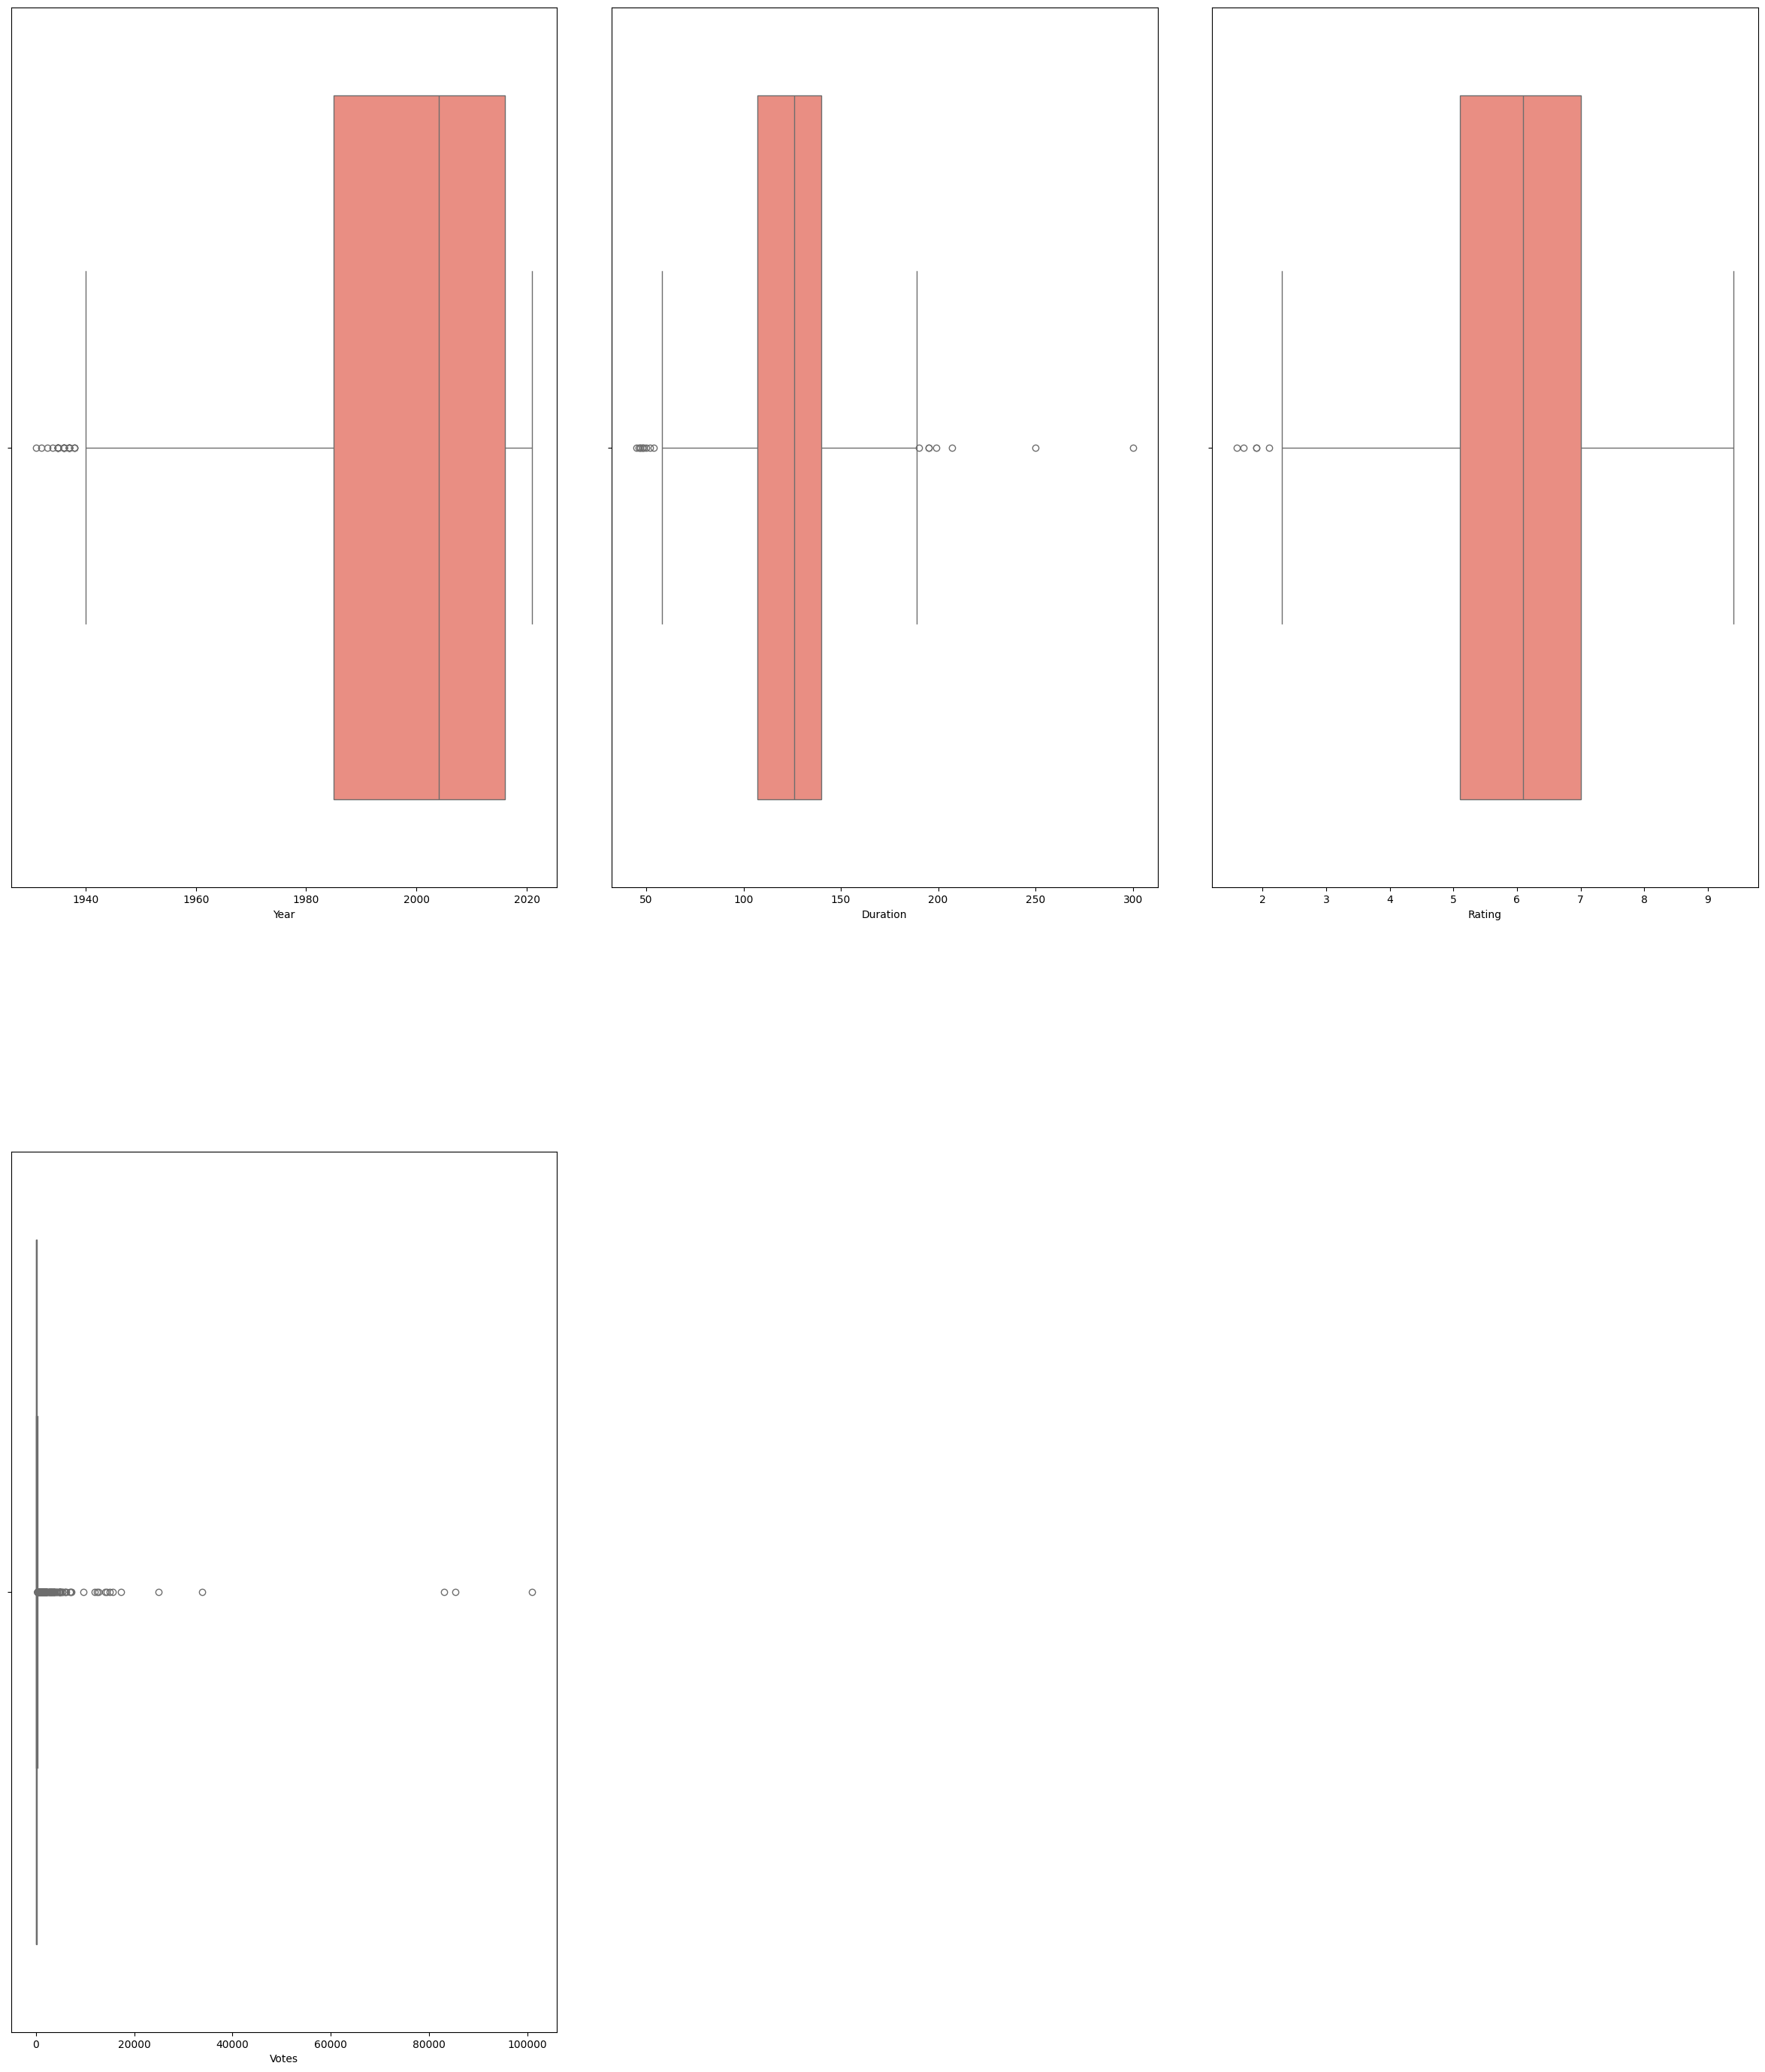

In [31]:
plot_univariate_subplots(df = df,
                         col_num = 3,
                         plot_type = 'boxplot',
                         figsize = (30,35),
                         color_hue = 'salmon',
                         wspace = 0.1,
                         hspace = 0.3,
                         numeric_columns = numeric_columns)

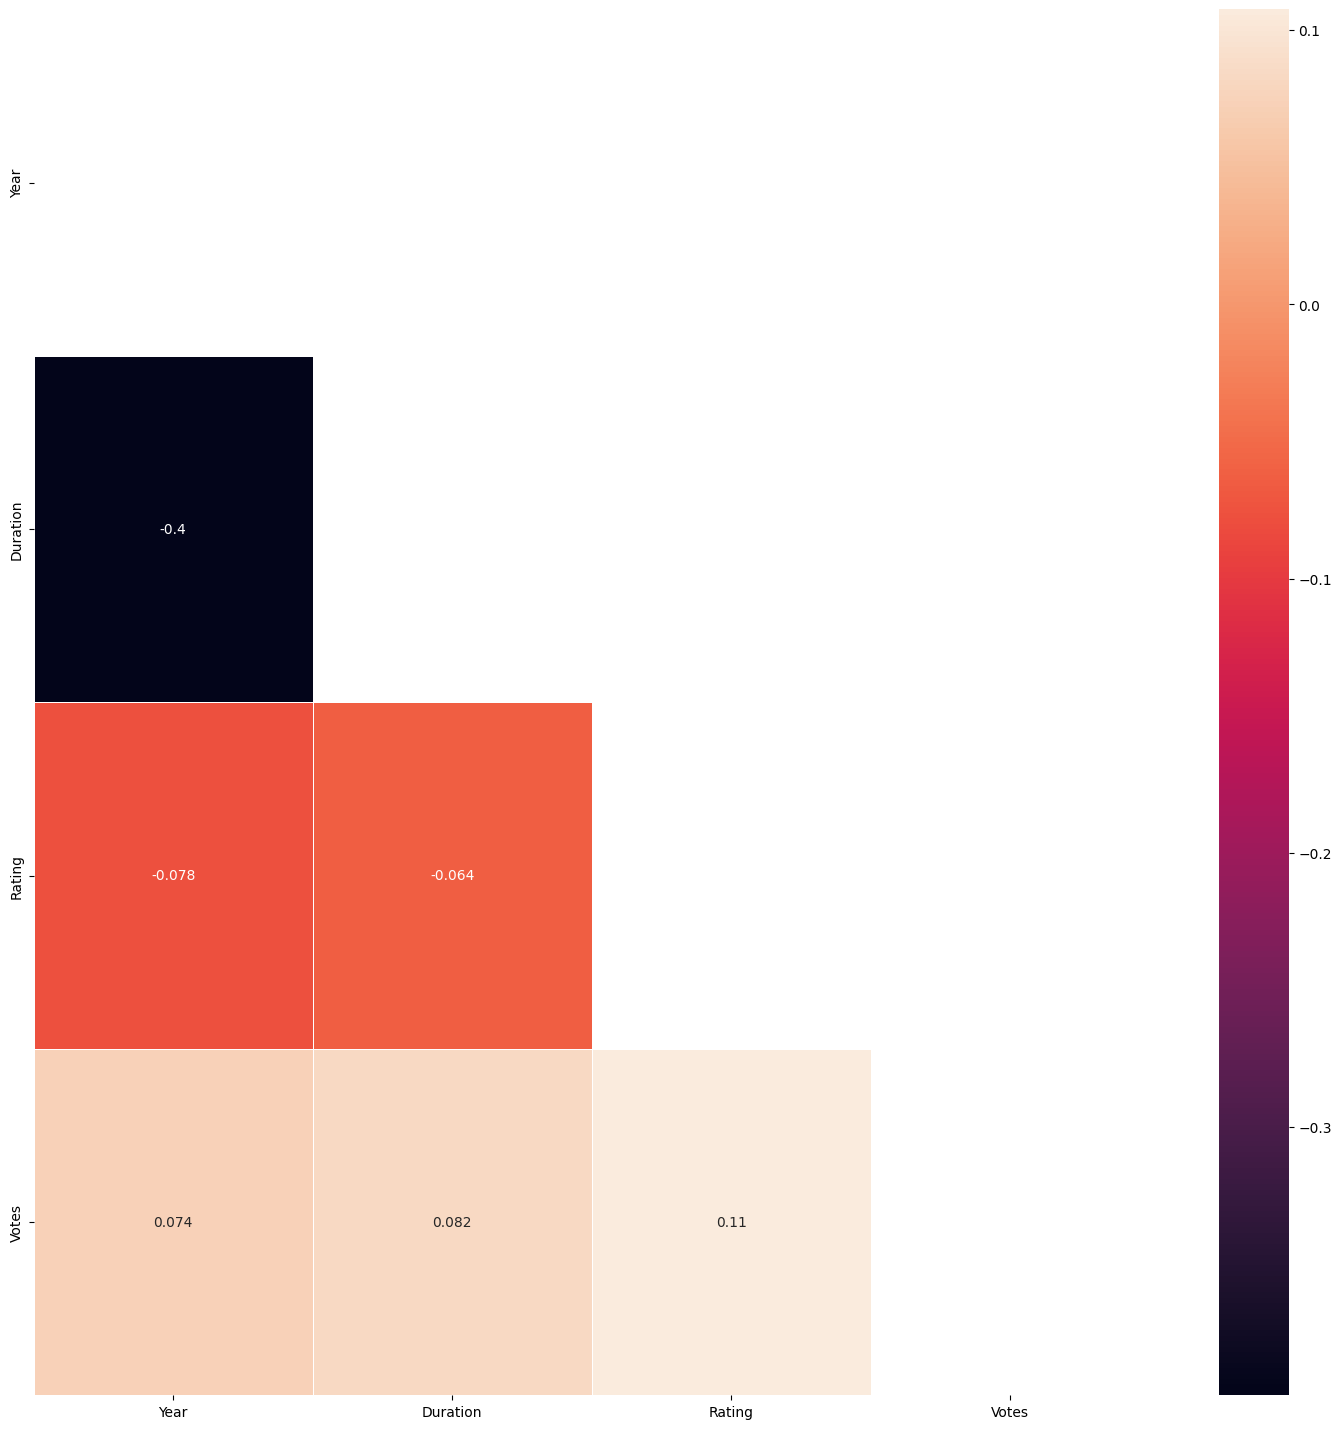

In [32]:
temp = df.loc[:,numeric_columns].corr()
fig,axes = plt.subplots(figsize=(18, 18))
matrix = np.triu(temp)
sns.heatmap(temp, annot=True, linewidths=.5,ax=axes, mask=matrix)
plt.show()

In [33]:
#model building

In [34]:
df.shape

(1528, 10)

In [39]:
df.drop('Name', axis = 1, inplace = True)
genreRating = df.groupby('Genre')['Rating'].transform('mean')
df['GenreRating'] = genreRating

directorRating = df.groupby('Director')['Rating'].transform('mean')
df['DirectorRating'] = directorRating

actor1Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1Rating'] = actor1Rating

actor2Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2Rating'] = actor2Rating

actor3Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3Rating'] = actor3Rating

In [40]:
x = df[[ 'Year', 'Votes', 'Duration', 'GenreRating','DirectorRating','Actor1Rating', 'Actor2Rating', 'Actor3Rating']]
y = df['Rating']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [42]:
#logistic regression

In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [44]:
lr.score(x_train,y_train)

0.9298494622191525

In [45]:
lr.score(x_test,y_test)

0.9252958916030264

In [49]:
#random forest

In [52]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)